<a href="https://colab.research.google.com/github/SolomonAgyire/Pytorch-Tutorial/blob/main/Basic_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [48]:
# Create a model class that inherits nn.module
class Model(nn.Module):
  #input layer (4 features of the flower ) -->
  #Hidden layer1 (number of neurons) -->
  #H2(n) -->
  #Output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  #call the super class to instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [49]:
#pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of the model
model = Model()


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [52]:
#display your dataset
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [53]:
# Replacing the results to 1,2,3 or changing last columns strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

# you can also use this function: my_df['variety'] = my_df(['Satosa', 'Versicolor','Verginica'], [1,2,3])


my_df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [54]:
# Train Test Split! Set x, y

X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [55]:
# Setting them to numoy arrays
X = X.values
y = y.values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [58]:
# Convert X features to float tensors
X_train = torch.FloatTensor (X_train)
X_test = torch.FloatTensor (X_test)

# COnvert y labels to long tensors
y_train = torch.LongTensor (y_train)
y_test = torch.LongTensor (y_test)

In [59]:
# Set the Criterial of model to measure the error, ie. how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer (There are so manu optimizers, this is popular), lr = learning rate (if error doesn't go down after a bunch of iterations (epochs).., we want to lower our learning rate)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [60]:
# Train our model
# Epoch ( One run through all the training data in our network)

epochs = 100
losses = []

for i in range(epochs):
  #Go forwars and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, how high is the error at first
  loss = criterion(y_pred, y_train)  # Predicted value vs y_train values

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i%10 == 0:
    print(f'EpochL {i} and loss: {loss}')

  # Do some back propagation: take the error rate if  forward propagation and feed it back through the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


EpochL 0 and loss: 1.125203251838684
EpochL 10 and loss: 1.0097211599349976
EpochL 20 and loss: 0.8162347674369812
EpochL 30 and loss: 0.585993230342865
EpochL 40 and loss: 0.4003389775753021
EpochL 50 and loss: 0.26794716715812683
EpochL 60 and loss: 0.1796349585056305
EpochL 70 and loss: 0.12165623158216476
EpochL 80 and loss: 0.0860651507973671
EpochL 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

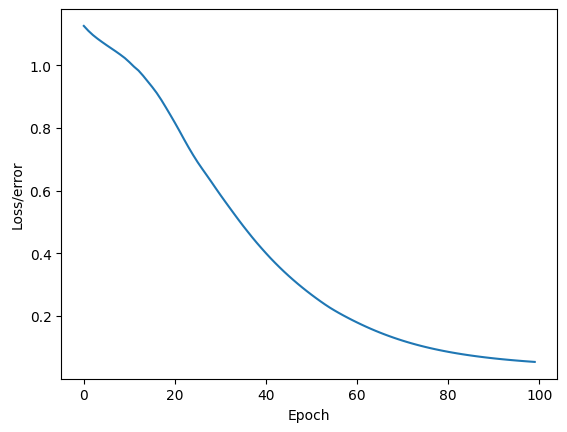

In [61]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [62]:
# Evaluate Model on Test Data Set (Validate model on test set)

with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) #X_test are the features from our test set and y_eval are the predictions from our test set

  loss = criterion(y_eval, y_test) # Find loss or errors

In [63]:
loss

tensor(0.1315)

In [64]:
# lets see what our network did on our test data vs the actual data

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    #This will tell us what type of flower our network class thinks it is
    print(f'{i+1} {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}') # we added the y_val.argmax.item() just to let us match the errors in the predictions


    #Correct or not
    if y_val.argmax().item() == y_test[i]: # y_val.argmax() tells what the prediction is and y_test[i] tells what the actual item is

      correct += 1

print(f'The correct answers are {correct}')

print(f'Accuracy: {(correct)/(len(X_test)) * 100}')

1 tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2 tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3 tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4 tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5 tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6 tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7 tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8 tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9 tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10 tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11 tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12 tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13 tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14 tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15 tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16 tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17 tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18 tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19 tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20 tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21 tensor([-2.6161,  4.5584,  0.8575]) 	 1 	 1
22 tensor([-7.7427,  4

Feed New Data into the model to predict

In [65]:
new_flower = torch.tensor([5.1,3.5,1.4,0.2])

In [66]:
with torch.no_grad():
  print(model(new_flower))

tensor([ 4.8061, -2.4691, -2.9990])


Save and Load NN for Pytorch

In [67]:
# Save NN Model

torch.save(model.state_dict(), 'my_first_iris_model.pt')


In [68]:
# Load the NN model

new_model = Model()
new_model.load_state_dict(torch.load('my_first_iris_model.pt'))

<All keys matched successfully>

In [69]:
# Make sure it loaded correctly

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)